In [1]:
import os
from matplotlib import pyplot as plt
from ipywidgets import interact

44
34.png


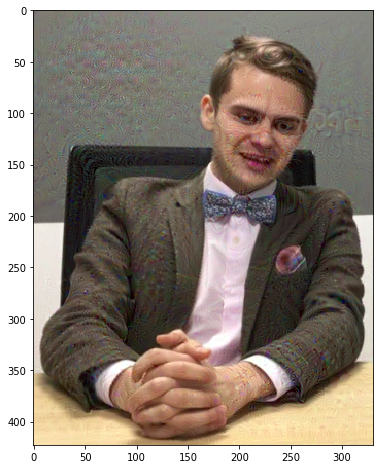

In [3]:
def browse_through_results(nr):
    foldername ='results/video/notpointing/resnet' 
    imgs_list = sorted(os.listdir(foldername))
    print len(imgs_list)
    img_name = [c for c in imgs_list if nr == c.split(".")[0]][0]
    print img_name
    img = plt.imread(os.path.join(foldername,img_name))
    plt.figure(figsize = (16,8))
    plt.imshow(img)
    plt.show()
interact(browse_through_results,nr = "0")

In [8]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.imagenet_utils import preprocess_input,decode_predictions
from keras.preprocessing import image as img_utils
from keras.layers import Input

# this will contain our generated image
img_size = (224, 224, 3)
input_template = Input(batch_shape=(1,) + img_size)

img_recognition_network = InceptionV3(input_tensor=input_template, 
                                weights='imagenet', 
                                include_top=False)

Using TensorFlow backend.


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys,os,glob
import numpy as np
sys.path.append('/home/jakub.czakon/deep_learning_art_webinar')
import utils

In [3]:
img_filename_list = utils.get_images_from_directory(dir_path='data',
                                                    extensions = ['jpg','jpeg'])

img_list = [img_utils.load_img(f,target_size= img_size[:2]) 
            for f in img_filename_list]
img_tensors_list = [utils.img2vggtensor(im) for im in img_list]

In [4]:
predictions = [img_recognition_network.predict(im) for im in img_tensors_list]

In [6]:
print predictions[0].shape

(1, 5, 5, 2048)
